# **BellaBeat Case Study: How Fitbit impact Users' Health data?**

# 1. Introduction (Ask)
Bellabeat is a a tech-driven wellness company for females that manufactures health-focused smart products. It is founded by Urška Sršen and Sando Mur in 2013, aspire to inspire women by designing beautiful technology that enhance their well-being. 

My task is to gather business insights from fitbit's users data and present my findings to Urška Sršen, Bellabeat’s co-founder and Chief Creative Officer, Sando Mur, Mathematician and Bellabeat’s cofounder, and Bellabeat marketing analytics team. In this project, I would like to focus on the product Leaf. Leaf is Bellabeat’s classic wellness tracker which can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.

From the Fitbit data, I could identify the target customers that use a tech gadgets for health. By analyzing the data, I aim to solve the problem of whether if people demonstrate a healtheier pattern with longer duration of using Fitbit. For example, if Fitbit provides enough incentives for people to become more active, or follow a regular eating habit when their calories intake are being tracked. 

# 2. Data Used (Plan)
Data Source: FitBit Fitness Tracker Data 
The data is publicly available on Kaggle and stored in 18 csv files.
Fitbit tacker data of 30 female users are collected from a distributed survey via Amazon Mechanical Turk with their consent. Their personal data inclusing their activity, sleep, and weight information are recorded.

2.1 Limitations
It is a sufficiently large sample size for the CLT to hold. However, there is a lack of information regarding the demographics of paricipants. Hence, it may be biased as informaiton like age, occupation and disability status can all affect one's activity and health status. 

2.2 ROCCC
Reliability: Uncertain. There is a  lack of the test-retest process to prove the accuracy of data. The survey is distributed to users with the lack of monitoring. Hence, data reliability depends significantly on users' honesty.

Originality: It is not the raw dataset that is originally collected from Amazon Mechanical Murk.

Comprehensiveness: The randomness of sample is uncertain since there is no backgrounds of the demographic of users provided. There could be bias as not all types of female users are represented in the sample. 

Current: It is a rather outdated data collected in 2016. It may not fully reflect current trend of 2022. 

Cited: It is not collected directly from fitbit database but a third party, Amazon Mechanical Murk.

2.3 Data used for Analysis
* dailyActivity_merged
* sleepDay_merged
* weightLogInfo_merged

# 3. Data Importing and Cleaning (Process)

In [1]:
library(tidyverse)
library(readr)
library(dplyr)
library(ggplot2)
library(corrplot)
library(lubridate)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

corrplot 0.88 loaded


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
##Importing and Naming
activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightlog <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [3]:
##Cleaning
#Reformat the data in time variables
activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate,format = "%m/%d/%y")
sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")
weightlog$Date=as.POSIXct(weightlog$Date, format= "%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
weightlog$date <- format(weightlog$Date, format = "%m/%d/%y")
#Create New variables counting the Number of Days on Fitbit Usage
numdays_a <- difftime(activity$ActivityDate, min(activity$ActivityDate), units = "day")
numdays_s <-difftime(sleep$SleepDay, min(sleep$SleepDay), units = "day")
numdays_w <- difftime(weightlog$Date, min(weightlog$Date), units = "day")
#Left join data 
daily <- merge(activity, sleep, by = c("Id", "date"), all = TRUE) 
merged_daily <- merge(daily, weightlog, by = c("Id", "date"), all = TRUE)
#Filter and Remove Null Values
cleaned_daily <- merged_daily %>% select(TotalSteps, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories, TotalMinutesAsleep, WeightKg, BMI) %>%
  drop_na()

In [4]:
#Preview of the Data
head(activity)
head(sleep)
head(weightlog)
head(cleaned_daily)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/16
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/16
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/16
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/16
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/16
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,04/17/16


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date
,<dbl>,<dttm>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,1,327,346,04/12/16
2,1503960366,2016-04-13,2,384,407,04/13/16
3,1503960366,2016-04-15,1,412,442,04/15/16
4,1503960366,2016-04-16,2,340,367,04/16/16
5,1503960366,2016-04-17,1,700,712,04/17/16
6,1503960366,2016-04-19,1,304,320,04/19/16


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,date
,<dbl>,<dttm>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,1503960366,2016-05-02 23:59:59,52.6,115.9631,22,22.65,True,1.462234e+12,05/02/16
2,1503960366,2016-05-03 23:59:59,52.6,115.9631,NA,22.65,True,1.462320e+12,05/03/16
3,1927972279,2016-04-13 01:08:52,133.5,294.3171,NA,47.54,False,1.460510e+12,04/13/16
4,2873212765,2016-04-21 23:59:59,56.7,125.0021,NA,21.45,True,1.461283e+12,04/21/16
5,2873212765,2016-05-12 23:59:59,57.3,126.3249,NA,21.69,True,1.463098e+12,05/12/16
6,4319703577,2016-04-17 23:59:59,72.4,159.6147,25,27.45,True,1.460938e+12,04/17/16


,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,WeightKg,BMI
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,14727,41,15,277,798,2004,277,52.6,22.65
2,15103,50,24,254,816,1990,273,52.6,22.65
3,356,0,0,32,986,2151,398,133.5,47.54
4,3428,0,0,190,1121,1692,115,69.9,27.32
5,12231,200,37,159,525,4552,549,90.7,28.00
6,10199,50,14,189,796,1994,366,62.5,24.39


In [5]:
#No. of participants in diff data sets
n_distinct(activity$Id)
n_distinct(sleep$Id)
n_distinct(weightlog$Id)

[1] 33

[1] 24

[1] 8

# 4. Analysis (Analyze and Share)

In [6]:
#Summary
activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()
activity %>%
  select(TotalSteps) %>%
  summary()
sleep %>%
  select(TotalMinutesAsleep) %>%
  summary()
weightlog %>%
  select(WeightKg, BMI) %>%
  summary()

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

   TotalSteps   
 Min.   :    0  
 1st Qu.: 3790  
 Median : 7406  
 Mean   : 7638  
 3rd Qu.:10727  
 Max.   :36019  

 TotalMinutesAsleep
 Min.   : 58.0     
 1st Qu.:361.0     
 Median :433.0     
 Mean   :419.5     
 3rd Qu.:490.0     
 Max.   :796.0     

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

# 4.1 Observations
* Most of the users are lightly active according to their minutes spent in activity.
* Average steps taken is 7638, which can be improved to a 10,000 steps/ day target for adults recommended by research (Schneider, P. L., Bassett Jr, D. R., Thompson, D. L., Pronk, N. P., & Bielak, K. M. (2006). Effects of a 10,000 steps per day goal in overweight adults. American Journal of Health Promotion, 21(2), 85-89.)
* Generally, the recommended daily calorie intake is 2,000 calories a day for women. The average of 2304 calories intake is slightly above the recommended standard.
* The average BMI of 25.19 falls in the overweight category.

# 4.2 Findings

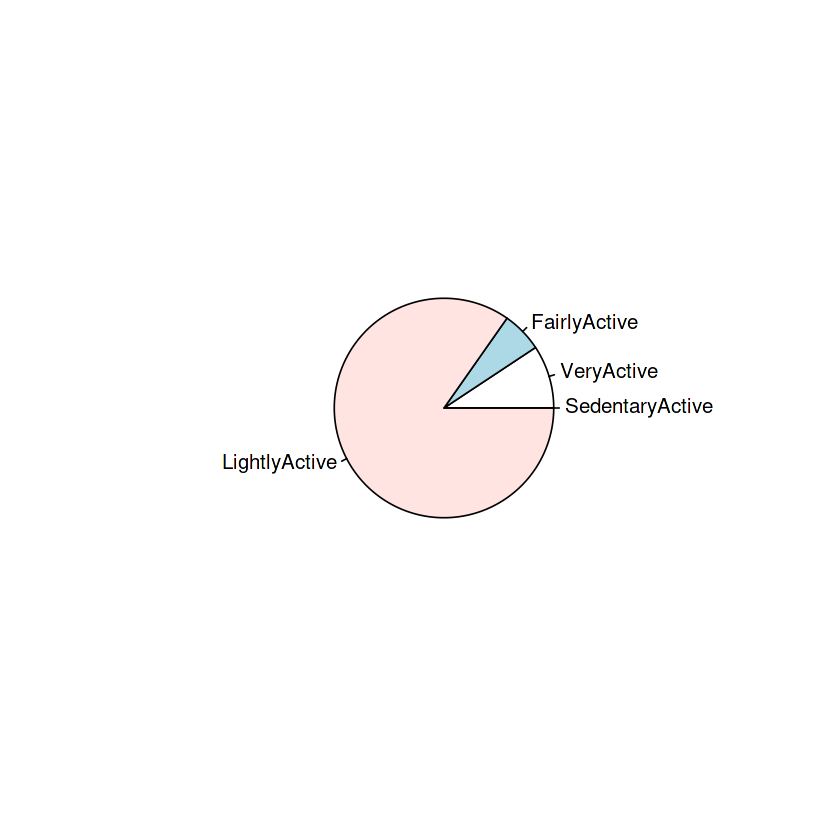

In [7]:
minutes <- c(sum(activity$VeryActiveMinutes), sum(activity$FairlyActiveMinutes), sum(activity$LightlyActiveMinutes), sum(activity$SedentaryActiveMinutes))
activeness <- c("VeryActive", "FairlyActive", "LightlyActive", "SedentaryActive")
activeminutes <- data.frame(activeness, minutes)
pie(minutes, labels = activeness)

4.2.1 Among the data collected from 33 users in a one month period, users spend most of the time engaging in lightly active activities. 

# Correlation between Health Variables and the Days of using Fitbit:
The Spearman correlation method computes the correlation between the rank of x and the rank of y variables.


Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



[1] -0.112792

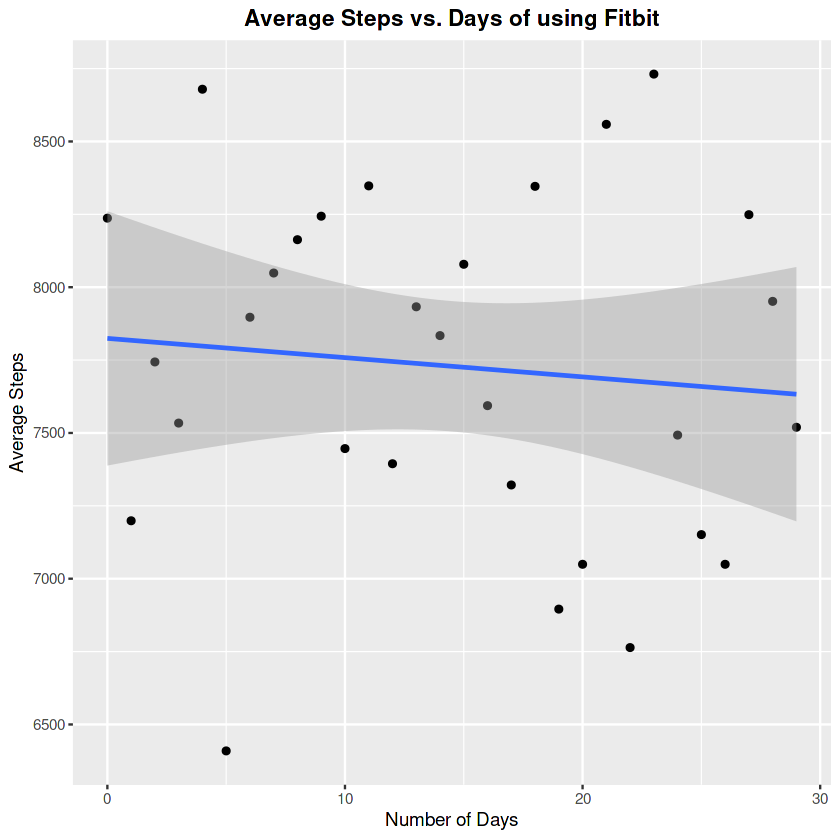

In [8]:
steps <- data.frame(steps = activity$TotalSteps, numdays_a)
avgsteps <- steps %>% 
  group_by(numdays_a) %>%
  summarise(meansteps = mean(steps))
#Removing an outlier in day31
avgsteps <- slice(avgsteps, -c(31))
plot1 <- ggplot(avgsteps, aes(x = numdays_a, y = meansteps)) + geom_point() + geom_smooth(method = "lm") +
  # Customization
  labs(title = 'Average Steps vs. Days of using Fitbit',
       x = 'Number of Days',
       y = 'Average Steps') +
  theme(plot.title = element_text(face = 'bold', hjust = 0.5))
plot1
cor(as.numeric(avgsteps$numdays_a), avgsteps$meansteps, method = c("spearman"))

4.2.2 The spearman's correlation coefficient of -0.11 indicates there is no relationship between steps taken and the duration of using fitbit. There is a slightly downward trend shows a negligible relationship.This is a surprising finding because I hypothesized that the users may be motivated to walk more steps when their steps are being tracked. 

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



[1] -0.337931

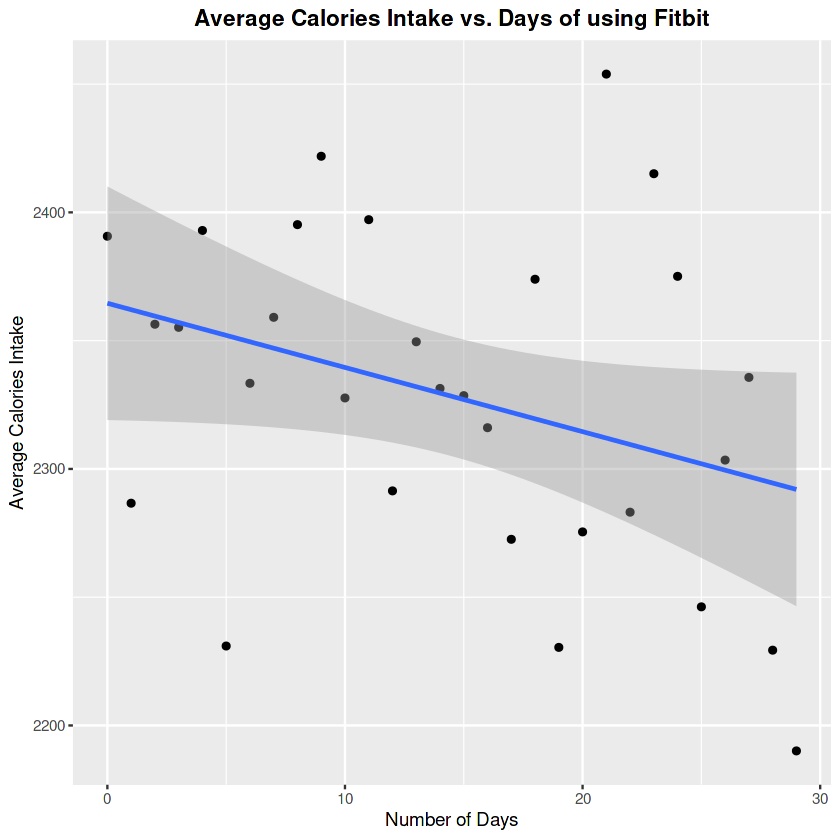

In [9]:
calories <- data.frame(calories = activity$Calories, numdays_a)
avgcalories <- calories %>% 
  group_by(numdays_a) %>%
  summarise(meancalories = mean(calories))
# Remove outlier
avgcalories <- slice(avgcalories, -c(31))
plot2 <- ggplot(avgcalories, aes(x = numdays_a, y = meancalories)) + geom_point() + geom_smooth(method = "lm")+
  # Customization
  labs(title = 'Average Calories Intake vs. Days of using Fitbit',
       x = 'Number of Days',
       y = 'Average Calories Intake') +
  theme(plot.title = element_text(face = 'bold', hjust = 0.5))
plot2
cor(as.numeric(avgcalories$numdays_a), avgcalories$meancalories, method = c("spearman"))

4.2.3 The spearman's correlation coefficient of -0.33 indicates a moderately negative relationship between steps taken and the duration of using fitbit. It is reflected on the downward graphical trend which illustrates a negative relationship that users' average calories intake decreases, the longer they use Fitbit. 

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



[1] -0.3797553

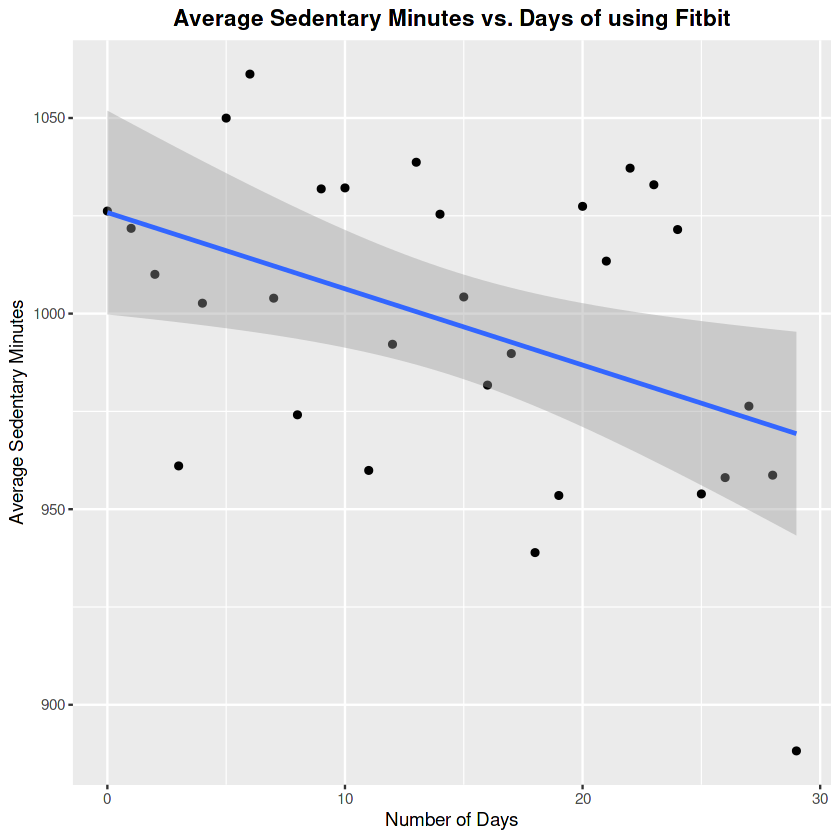

In [10]:
sedentary <- data.frame(sedentarymin = activity$SedentaryMinutes, numdays_a)
avgsedentary <- sedentary %>% 
  group_by(numdays_a) %>%
  summarise(meansedentary = mean(sedentarymin))
#Remove Outlier
avgsedentary <- slice(avgsedentary, -c(31))
plot3 <- ggplot(avgsedentary, aes(x = numdays_a, y = meansedentary)) + geom_point() + geom_smooth(method = "lm")+
  # Customization
  labs(title = 'Average Sedentary Minutes vs. Days of using Fitbit',
       x = 'Number of Days',
       y = 'Average Sedentary Minutes') +
  theme(plot.title = element_text(face = 'bold', hjust = 0.5))
plot3
cor(as.numeric(avgsedentary$numdays_a), avgsedentary$meansedentary, method = c("spearman"))


4.2.4 The spearman's correlation coefficient of -0.37 indicates a moderately negative relationship between steps taken and the duration of using fitbit. A downward trend is also shown that  users' average sedentary minutes decreases, the longer they use Fitbit. This is a good news that users tend to spend less time in sedentary activity the longer they wear fitbit. 

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



[1] 0.07320058

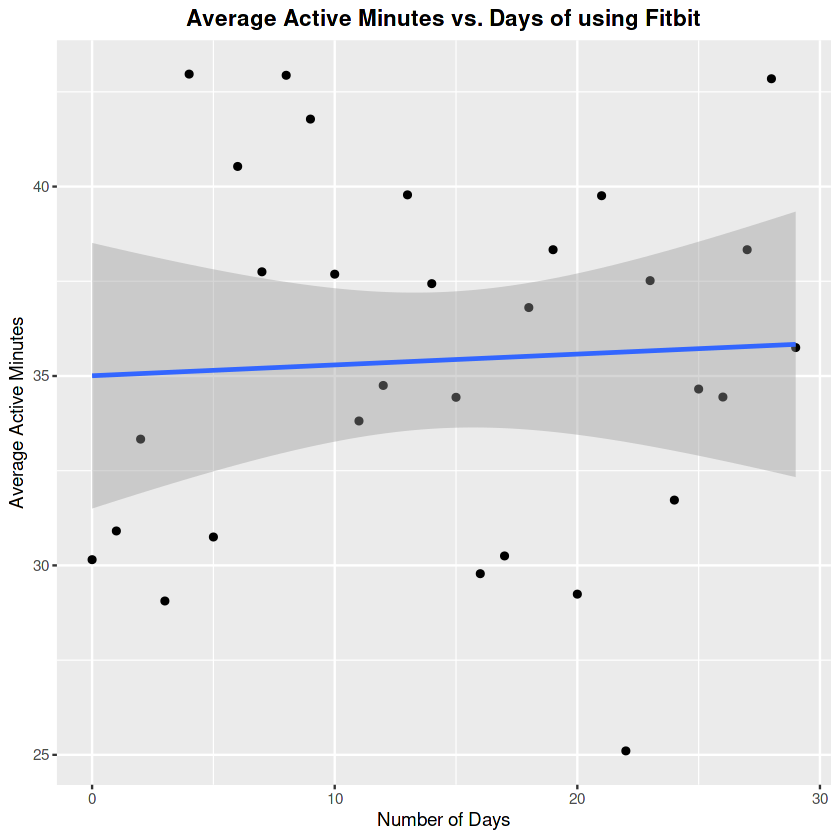

In [11]:
activemin <- data.frame(ActiveMinutes = activity$VeryActiveMinutes + activity$FairlyActiveMinutes, numdays_a)
avgactivemin <- activemin %>% 
  group_by(numdays_a) %>%
  summarise(meanactivemin = mean(ActiveMinutes))
avgactivemin <- slice(avgactivemin, -c(31))
plot4 <- ggplot(avgactivemin, aes(x = numdays_a, y = meanactivemin)) + geom_point() + geom_smooth(method = "lm")+
  # Customization
  labs(title = 'Average Active Minutes vs. Days of using Fitbit',
       x = 'Number of Days',
       y = 'Average Active Minutes') +
  theme(plot.title = element_text(face = 'bold', hjust = 0.5))
plot4
cor(as.numeric(avgactivemin$numdays_a), avgactivemin$meanactivemin, method = c("spearman"))

According to Fitbit, the “active” Fitbit category (fairly active + very active = a minimum of 3 METs or more in at least 10-minute bouts) comprised what is generally considered moderate-to-vigorous physical activity (MVPA). So, here the Active Minutes are the sum of Very Active Minutes and Fairly Active Minutes.

4.2.5 There is a slight upward trend which illustrates a positive relationship that users' average active minutes increases, the longer they use Fitbit. This is a good news that users tend to spend more time in active activity (even just a little bit), the longer they wear fitbit. However,the spearman's correlation coefficient of 0.07 is too small to indicate any relationship between active minutes and the duration of using fitbit. 

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



[1] -0.09919355

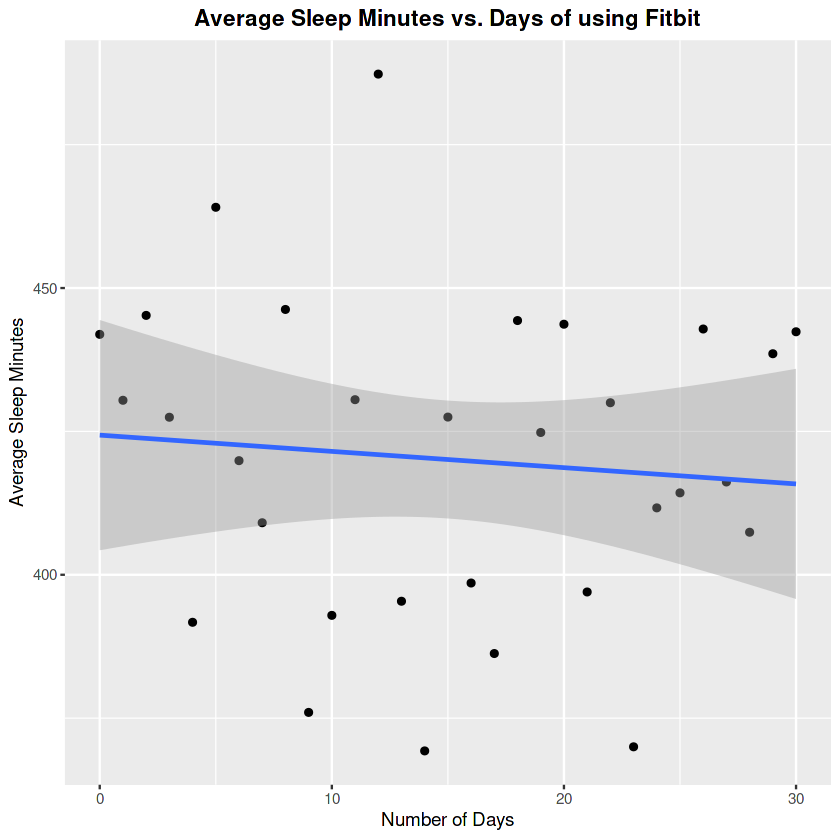

In [12]:
slp <- data.frame(slpmin = sleep$TotalMinutesAsleep, numdays_s)
avgslp<- slp %>% 
  group_by(numdays_s) %>%
  summarise(meanslpmin = mean(slpmin))
plot5 <- ggplot(avgslp, aes(x = numdays_s, y = meanslpmin)) + geom_point() + geom_smooth(method = "lm") +
  # Customization
  labs(title = 'Average Sleep Minutes vs. Days of using Fitbit',
       x = 'Number of Days',
       y = 'Average Sleep Minutes') +
  theme(plot.title = element_text(face = 'bold', hjust = 0.5))
plot5
cor(as.numeric(avgslp$numdays_s), avgslp$meanslpmin, method = c("spearman"))

4.2.6 There is a slight downward trend which illustrates a negative to no relationship that users' average sleeping minutes is affected by the duration they use Fitbit. The spearman's correlation coefficient of -0.09 further prove that there is no relationship between sleeping minutes and the duration of using fitbit.

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



[1] -0.2326777

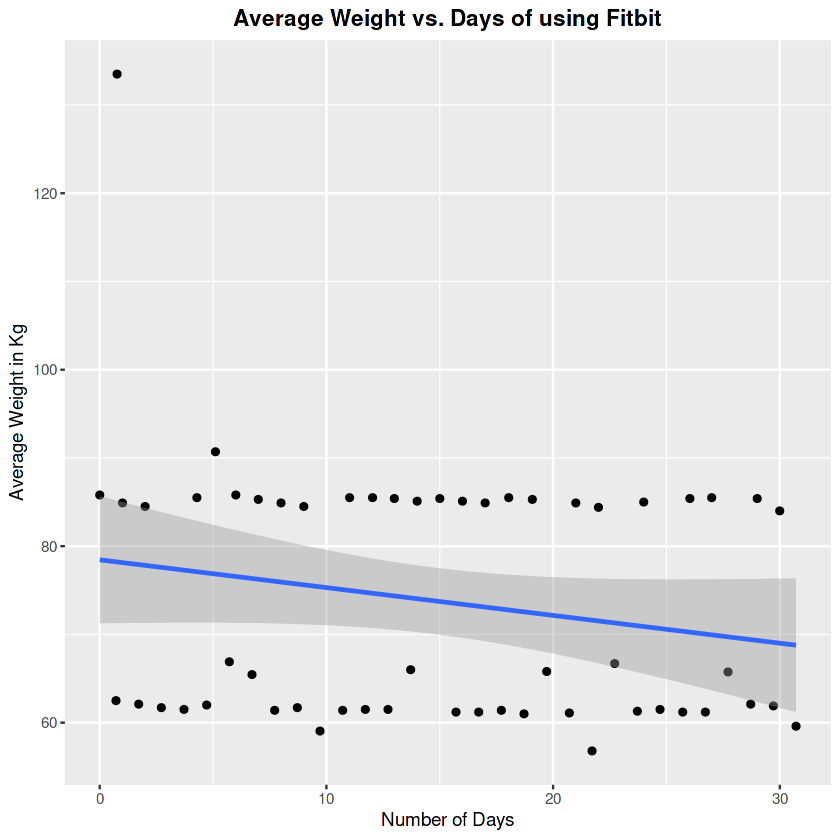

In [13]:
weight <- data.frame(weightlog = weightlog$WeightKg, numdays_w)
avgweight<- weight %>% 
  group_by(numdays_w) %>%
  summarise(meanweight = mean(weightlog))
plot6 <- ggplot(avgweight, aes(x = numdays_w, y = meanweight)) + geom_point() + geom_smooth(method = "lm") +
  # Customization
  labs(title = 'Average Weight vs. Days of using Fitbit',
       x = 'Number of Days',
       y = 'Average Weight in Kg') +
  theme(plot.title = element_text(face = 'bold', hjust = 0.5))
plot6
cor(as.numeric(avgweight$numdays_w), avgweight$meanweight, method = c("spearman"))

4.2.7 The spearman's correlation coefficient of -0.2 and the slightly downward trend illustrates a weak negative relationship that users tend to lose weight the longer they use Fitbit. There is also one outlier that may be a wrong entry of weight since weight should be a consistent variable. 

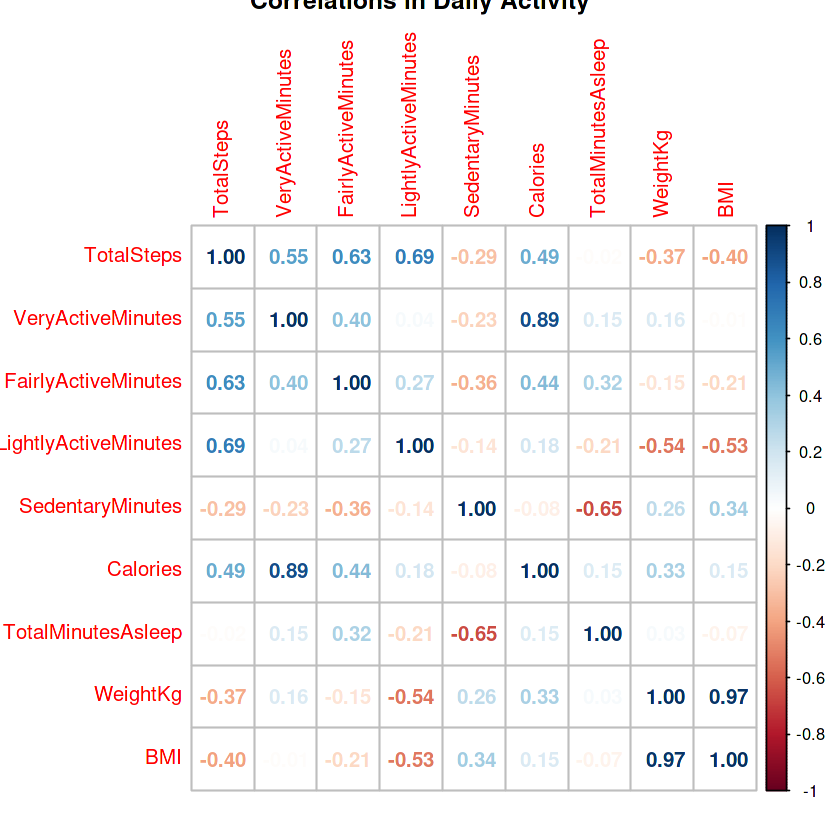

In [14]:
D <- cor(cleaned_daily)
corrplot(D, method = 'number', main="Correlations in Daily Activity")

4.2.8 The Correlations between Health Variables
* Users who engage more in active activities including very active, fairly active and lightly active tend to walk more steps as well.
* Users who engage more in very active activities usually eat more calories, sleep more and have a slightly higher weight. One possibility of weight gain can be muscle gaining.
* Users who engage more in sedentary activities tend to have less calories intake, less sleeping minutes, while having higher weights and BMIs.
* Minutes in fairly active activities has the most positive (moderate) correlation with how long users sleep, while minutes in sedentary activities has a strong negative correlation with sleeping minutes.



# 5. Recommendations for Bellabeat Marketing Strategy (Act)
1. Potential customers are mostly lightly active. The product design of Leaf can has less considerations on sporty aesthetics. Instead, focusing on a fashionable and chic design can be a good strategy to differentitate from Fitbit. 
2. Fitbit steps tracker does not impact users' incentives to walk more steps. Goal-setting and a routinely reminder may be a useful function to motivate users to ttake more steps.
3. Although users may not be more active, but they are less sedentary and consume less calories, the longer they use Fitbit. Users may have incentive to be more active and are conscious about their calories intake, but they may need motivation to be more active. One recommendations is to create a community for BellaBeat users, in which they can share their progress with notification systems to their friends. At the same time, generating motivation for them to become more active. 
4. The current function of Fitbit doesn't have any impact on users' sleeping minutes. Besides, motivatting them tto be more active. Bellabeat can add more values on the sleep tracker, for example functions like sleeping quality tracker and regular sleeping reminder to improve users' sleeping duration and enhance users' well-being. 
5. The average calories intake is slightly above the recommended standard and the average BMI is under the overweight category. It is alarming that most users are at increased risk for a variety of illnesses. Hence, BellaBeat should focus on health education. One recomendations is daily piece of health knowledge and advice that educate users on the importance of healthy diet and exercise.